<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework1/hw1_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('synthetic_dataset100_training.csv')
df_train.insert(0,"x0",[1 for i in range(len(df_train))])
# df_train.info()

df_test = pd.read_csv('synthetic_dataset10000_testing.csv')
df_test.insert(0,"x0",[1 for i in range(len(df_test))])
# df_test.head


<bound method NDFrame.head of     x0        x1        x2    y
0    1 -5.246477 -0.267207 -1.0
1    1 -3.205512 -6.160842 -1.0
2    1  4.516512  1.800307  1.0
3    1 -9.151648  7.224017  1.0
4    1 -6.601551  1.242423 -1.0
..  ..       ...       ...  ...
95   1  9.612895  6.083079  1.0
96   1 -6.715970 -1.018083 -1.0
97   1  4.212391  5.307468  1.0
98   1 -7.542477  3.333851  1.0
99   1  0.229071  2.148677  1.0

[100 rows x 4 columns]>


<Axes: xlabel='x1', ylabel='x2'>

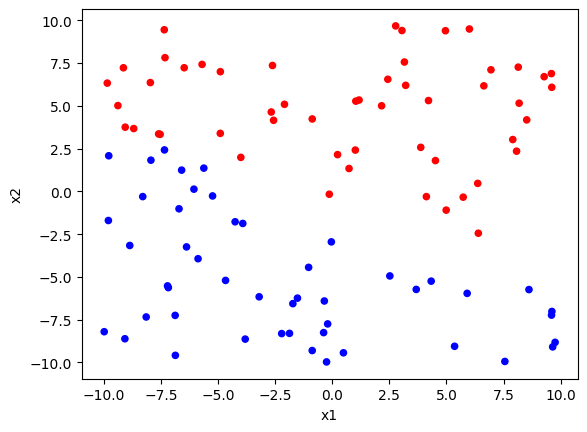

In [2]:
df_train["color"] = np.where(df_train["y"]==1, "red", "blue")
df_train.plot.scatter(x="x1", y="x2", color=df_train["color"])

In [3]:
df_y = df_train["y"]

def check_for_misclassified(w, df):
  for i in range(df.shape[0]):
      x = df.iloc[i, :3].values
      classified_value = np.dot(w, x)

      if classified_value * df_y.iloc[i] <= 1:
        x = np.append(x, df_y.iloc[i])
        return x
  return [-1,-1,-1,1]

In [66]:
def plot_graph(i, w):
  #The weights used in setting up synthetic dataset
  fw0 = 0.0005
  fw1 = 0.0004
  fw2 = 0.0009

  col = df_train['y'].map({-1:'b', 1:'r'})
  df_train.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  plt.xticks(range(-11,11))
  plt.yticks(range(-11,11))

  plt.ylim(-11, 11)
  plt.xlim(-11, 11)

  x_vals = np.array(axes.get_xlim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  fyAxis = -fw0/fw2 - (fw1/fw2*x_vals)
  plt.plot(x_vals, y_vals, '--')
  plt.plot(x_vals, fyAxis, '-')

w = [0,0,0]
def perceptron_adaline(df, n, max_iters):
  global w
  w = [0,0,0]
  i=0

  while(i<max_iters):
    misclass = check_for_misclassified(w, df)
    x = misclass[0:3]
    y = misclass[3]

    s = np.dot(w,x)
    w = w + n*(y-s)*x

    if np.isnan(w[0]):
      break

    i=i+1

  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w)
  plot_graph(i, w)
  return w

In [79]:
#calculating accuracy
def is_misclassified(w, point):
  x = point[0:3]
  y = point[3]
  classified_value = np.dot(w, x)


  if classified_value > 0:
      classified_value = 1
  else:
      classified_value = -1

  return classified_value != y

def count_misclass(final_weights):
  count_of_misclassified = 0

  for i in range(len(df_test)):
    misclassified = is_misclassified(final_weights, df_test.iloc[i].values)
    if misclassified==True:
      count_of_misclassified+=1

  print("percent of accuracy:",(1 - count_of_misclassified/len(df_test))*100, "%")



<ipython-input-66-45c0aa76728c>:34: RuntimeWarning: invalid value encountered in add
  w = w + n*(y-s)*x


This is how many iterations it takes: 85
This is the final weight:  [nan nan nan]
percent of accuracy: 46.78 %


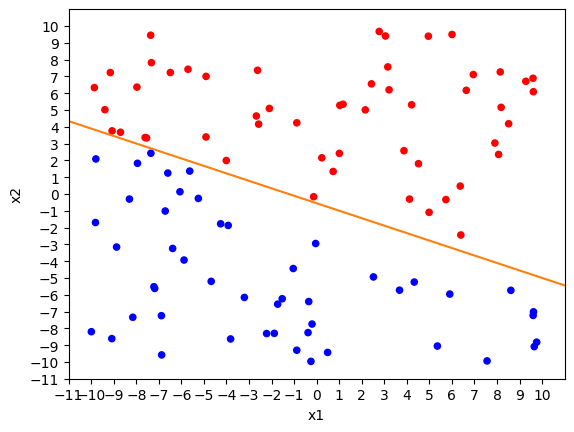

In [80]:
w = perceptron_adaline(df_train, 100, 1000)
count_misclass(w)

<ipython-input-66-45c0aa76728c>:34: RuntimeWarning: invalid value encountered in add
  w = w + n*(y-s)*x


This is how many iterations it takes: 145
This is the final weight:  [nan nan nan]
percent of accuracy: 46.78 %


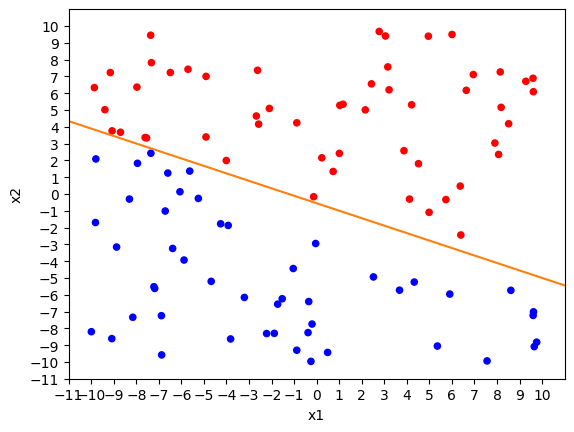

In [81]:
w = perceptron_adaline(df_train, 3, 1000)
count_misclass(w)


This is how many iterations it takes: 1000
This is the final weight:  [-0.0349688   0.18346301  0.00934391]
percent of accuracy: 61.58 %


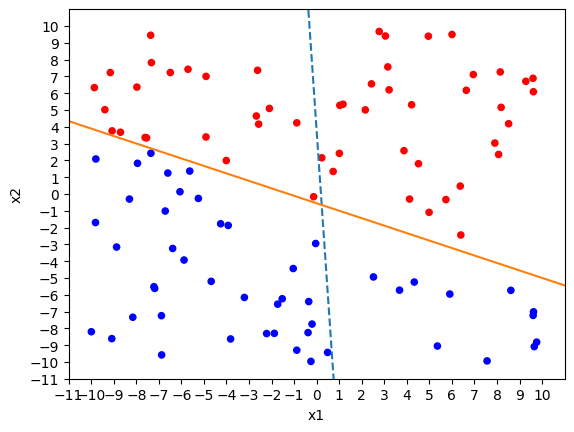

In [82]:
w = perceptron_adaline(df_train, .01, 1000)
count_misclass(w)

This is how many iterations it takes: 1000
This is the final weight:  [-0.03297375  0.17299604  0.00881082]
percent of accuracy: 61.58 %


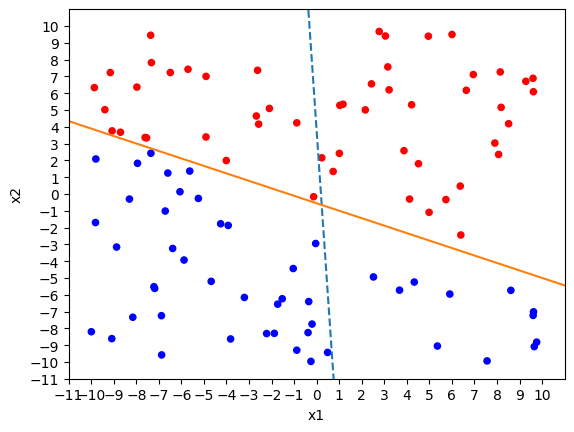

In [83]:
w = perceptron_adaline(df_train, .0001, 1000)
count_misclass(w)

This is how many iterations it takes: 1000
This is the final weight:  [2.98966858e+59 5.38932829e+59 1.36204581e+60]
percent of accuracy: 98.11999999999999 %


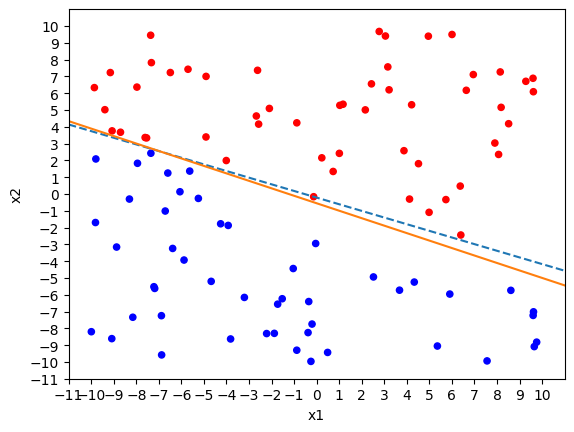

In [84]:
w = perceptron_adaline(df_train, .09, 1000)
count_misclass(w)